In [84]:
#Instalamos pandas
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn


In [85]:
# Importamos pandas y numpy
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [86]:
#Cargamos el df
sharks_df = pd.read_excel("https://www.sharkattackfile.net/spreadsheets/GSAF5.xls")

In [87]:
#Imprimimos el df

print(sharks_df)

                                                   Date    Year  \
0                                                   NaN     NaN   
1                                                     y     NaN   
2                                                     x     NaN   
3                                   2024-09-16 00:00:00  2024.0   
4                                   2024-08-26 00:00:00  2024.0   
5                                   2024-08-06 00:00:00  2024.0   
6                                   2024-07-23 00:00:00  2024.0   
7                                   2024-07-18 00:00:00  2024.0   
8                                   2024-07-08 00:00:00  2024.0   
9                                   2024-07-05 00:00:00  2024.0   
10                                  2024-07-04 00:00:00  2024.0   
11                                  2024-07-04 00:00:00  2026.0   
12                                  2024-07-04 00:00:00  2025.0   
13                                  2024-07-04 00:00:00  2024.

In [88]:
# Exploramos los primeros registros
print(sharks_df.head())


                  Date    Year        Type  Country             State  \
0                  NaN     NaN         NaN      NaN               NaN   
1                    y     NaN         NaN      NaN               NaN   
2                    x     NaN         NaN      NaN               NaN   
3  2024-09-16 00:00:00  2024.0  Unprovoked  Morocco  Southern Morocco   
4  2024-08-26 00:00:00  2024.0  Unprovoked  Jamaica       Montego Bay   

         Location                     Activity            Name  Sex  Age  ...  \
0             NaN                          NaN             NaN  NaN  NaN  ...   
1             NaN                          NaN             NaN  NaN  NaN  ...   
2             NaN                          NaN             NaN  NaN  NaN  ...   
3  West of Dakhla  Swimming - jumped off yacht  German Tourist    F   30  ...   
4        Falmouth                 Spearfishing    Jahmari Reid    M   16  ...   

                   Species                                             Sou

In [89]:
# Convertir la columna 'Date' a formato datetime
sharks_df['Date'] = pd.to_datetime(sharks_df['Date'], errors='coerce')


In [90]:
# Verificar si hay fechas nulas
print(sharks_df['Date'].isnull().sum())

1028


In [91]:

# Filtrar el dataframe para obtener años entre 2017 y 2023
sharks_df = sharks_df[(sharks_df['Date'].dt.year >= 2017) & (sharks_df['Date'].dt.year < 2024)]

In [92]:
# Verificamos el tamaño del DataFrame después de filtrar
print(sharks_df.shape)

(756, 23)


In [93]:
print(sharks_df.head())

         Date    Year        Type    Country              State  \
38 2023-12-30  2023.0  Unprovoked        USA             Hawaii   
39 2023-12-29  2023.0  Unprovoked     MEXICO             Sonora   
40 2023-12-28  2023.0  Unprovoked  AUSTRALIA    South Australia   
41 2023-12-25  2023.0  Unprovoked  AUSTRALIA    New South Wales   
42 2023-12-24  2023.0  Unprovoked  AUSTRALIA  Western Australia   

                              Location       Activity                  Name  \
38                    Baby Beach, Maui        Surfing          Jason Carter   
39  Tojahui Beach, Yavaros, Huatabampo    Free diving  Víctor Alejandro “N”   
40                         Ethel Beach        Surfing           Khai Cowley   
41                             Old Bar        Surfing       Julian McLennan   
42                        Wedge Island  Foil Boarding            Troy Brown   

   Sex Age  ...          Species                   Source  pdf href formula  \
38   M  39  ...               NaN      Surf

In [94]:
#Exploramos los tipos de datos en cada columna
print(sharks_df.dtypes)

Date              datetime64[ns]
Year                     float64
Type                      object
Country                   object
State                     object
Location                  object
Activity                  object
Name                      object
Sex                       object
Age                       object
Injury                    object
Unnamed: 11               object
Time                      object
Species                   object
Source                    object
pdf                       object
href formula              object
href                      object
Case Number               object
Case Number.1             object
original order           float64
Unnamed: 21               object
Unnamed: 22               object
dtype: object


In [95]:
#Vemos cuantas filas tenemos
sharks_df.shape

(756, 23)

In [96]:
# Revisamos valores únicos en cada columna
print(sharks_df.nunique())

Date              619
Year                7
Type               11
Country            52
State             150
Location          604
Activity          104
Name              544
Sex                 3
Age               140
Injury            536
Unnamed: 11         6
Time              159
Species           244
Source            420
pdf               630
href formula      627
href              623
Case Number       625
Case Number.1     622
original order    629
Unnamed: 21         0
Unnamed: 22         0
dtype: int64


In [97]:
#Contamos el número de NA en cada columna
print(sharks_df.isnull().sum())

Date                0
Year                0
Type               13
Country             0
State              25
Location           18
Activity           38
Name               14
Sex                18
Age               186
Injury              6
Unnamed: 11        30
Time              178
Species           334
Source              4
pdf               126
href formula      129
href              129
Case Number       127
Case Number.1     128
original order    126
Unnamed: 21       756
Unnamed: 22       756
dtype: int64


In [98]:
# Eliminamos las columnas que solo tienen NA

sharks_df = sharks_df.drop(columns=["Unnamed: 21", "Unnamed: 22"])


In [99]:
# Exploramos los valores únicos en las columnas relevantes

print(pd.Series({c: sharks_df[c].unique() for c in sharks_df}))

Date              [2023-12-30T00:00:00.000000000, 2023-12-29T00:...
Year              [2023.0, 2022.0, 2021.0, 2020.0, 2019.0, 2018....
Type              [Unprovoked, Questionable, Provoked, Watercraf...
Country           [USA, MEXICO, AUSTRALIA, NEW ZEALAND, BAHAMAS,...
State             [Hawaii, Sonora, South Australia, New South Wa...
Location          [Baby Beach, Maui, Tojahui Beach, Yavaros, Hua...
Activity          [Surfing, Free diving, Foil Boarding, Wading, ...
Name              [Jason Carter, Víctor Alejandro “N”, Khai Cowl...
Sex                                                 [M, F, nan,  M]
Age               [39, 22, 15, 16, 46, 21, 66, 52, 20, 44, 26, 4...
Injury            [FATAL, Injury to right thigh, Puncture wounds...
Unnamed: 11                                [Y, N, nan, F, M, n, Nq]
Time              [11h12, 13h00, 13h30, 16h30, 15h00, 02h00, 09h...
Species           [nan, White shark, White shark, 13', Broze wha...
Source            [Surfer, 12/31/2023, EuroESEur

In [100]:
# Examinamos y limpiamos la columna 'Country'

sharks_df['Country'] = (
    sharks_df['Country']
    .astype(str)
    .str.upper()
    .replace('<', '', regex=False)
    .str.strip()
)

In [101]:
# Mostramos los valores únicos de la columna 'Country'

print(np.sort(sharks_df["Country"].unique()))

['ARGENTINA' 'AUSTRALIA' 'BAHAMAS' 'BELIZE' 'BRAZIL'
 'BRITISH OVERSEAS TERRITORY' 'CANADA' 'CHINA' 'COLOMBIA' 'COLUMBIA'
 'COMOROS' 'COSTA RICA' 'CUBA' 'ECUADOR' 'EGYPT' 'ENGLAND' 'FIJI'
 'FRENCH POLYNESIA' 'INDONESIA' 'IRELAND' 'ISRAEL' 'ITALY' 'JAMAICA'
 'JAPAN' 'JORDAN' 'MALAYSIA' 'MALDIVES' 'MAURITIUS' 'MEXICO'
 'NEW CALEDONIA' 'NEW ZEALAND' 'PAPUA NEW GUINEA' 'PHILIPPINES' 'PORTUGAL'
 'REUNION' 'REUNION ISLAND' 'SAMOA' 'SEYCHELLES' 'SOUTH AFRICA' 'SPAIN'
 'ST HELENA, BRITISH OVERSEAS TERRITORY' 'ST KITTS / NEVIS' 'ST MARTIN'
 'THAILAND' 'TURKS AND CAICOS' 'UNITED ARAB EMIRATES' 'USA']


In [102]:
# Configuramos para mostrar todas las filas en la salida

pd.set_option("display.max_rows", None)

In [103]:
# Configuramos para mostrar todas las filas en la salida

pd.set_option("display.max_rows", None)

In [104]:
# Contamos los valores en 'Country'
print(sharks_df["Country"].value_counts())

USA                                      364
AUSTRALIA                                175
SOUTH AFRICA                              28
BAHAMAS                                   27
NEW ZEALAND                               18
MEXICO                                    16
BRAZIL                                    15
NEW CALEDONIA                             13
FRENCH POLYNESIA                          11
EGYPT                                     10
SPAIN                                      6
THAILAND                                   5
FIJI                                       5
REUNION ISLAND                             4
COSTA RICA                                 4
MALDIVES                                   4
CUBA                                       4
ECUADOR                                    3
JAMAICA                                    3
BELIZE                                     3
REUNION                                    3
ENGLAND                                    3
CHINA     

In [105]:
# Examinamos y limpiamos la columna 'Sex'
sharks_df['Sex'] = (
    sharks_df['Sex']
    .astype(str)
    .str.upper()
    .replace('<', '', regex=False)
    .str.strip()
)

In [106]:
# Mostramos los valores únicos de la columna 'Sex'
print(sharks_df["Sex"].nunique())


3


In [107]:
# Contamos los valores en 'Sex'
print(sharks_df["Sex"].value_counts())


M      562
F      176
NAN     18
Name: Sex, dtype: int64


In [108]:
# Reemplazar cadenas vacías o 'NaN' como texto por NaN real
sharks_df['Sex'] = sharks_df['Sex'].replace(['', 'NAN'], np.nan)

In [109]:
sharks_nan_sex = sharks_df[sharks_df['Sex'].isna()].reset_index(drop=True)

In [110]:
sharks_nan_sex

Date    Year          Type           Country              State  \
0  2023-08-23  2023.0    Unprovoked               USA     North Carolina   
1  2022-07-19  2022.0  Questionable               USA            Florida   
2  2022-05-27  2022.0    Unprovoked         AUSTRALIA  Western Australia   
3  2022-05-07  2022.0    Unprovoked  FRENCH POLYNESIA          Bora Bora   
4  2021-04-17  2021.0      Provoked               USA     North Carolina   
5  2021-01-22  2021.0    Watercraft               USA            Florida   
6  2020-10-25  2020.0    Unprovoked             EGYPT        South Sinai   
7  2020-08-30  2020.0    Watercraft         AUSTRALIA    New South Wales   
8  2020-07-29  2020.0    Watercraft         AUSTRALIA           Tasmania   
9  2020-06-20  2020.0    Unprovoked           BAHAMAS             Exumas   
10 2020-05-17  2020.0    Unprovoked  FRENCH POLYNESIA             Tahiti   
11 2019-12-20  2019.0      Provoked         AUSTRALIA    New South Wales   
12 2019-09-18  2019.0    Unprovoked               USA             Hawaii   
13 2019-07-18  2019.0   Unconfirmed               USA            Florida   
14 2017-09-01  2017.0    Watercraft         AUSTRALIA  Westerm Australia   
15 2017-07-02  2017.0       Invalid           COMOROS            Anjouan   
16 2017-04-17  2017.0    Unprovoked               USA            Florida   
17 2017-02-01  2017.0    Watercraft               USA     South Carolina   

                             Location  \
0        Oak Island, Brunswick County   
1      Cape Canaveral, Brevard County   
2                           Yallingup   
3                             To'opua   
4                         Outer Banks   
5                       Off Tampa Bay   
6            Shark Reef, Ras Muhammed   
7                             Forster   
8                        Tenth Island   
9               Pig Beach, Pig Island   
10                     Vallée Blanche   
11                       Shellharbour   
12                      Haleiwa, Oahu   
13  Haulover Inlet, Miami-Dade County   
14                          Esperance   
15                               Moya   
16      Daytona Beach, Volusia County   
17           16 miles off Hilton Head   

                                             Activity  \
0                                              Wading   
1                                                 NaN   
2                                             Surfing   
3                                                 NaN   
4                                      Tagging sharks   
5                                             Fishing   
6                                          Snorkeling   
7   Fishing / Filming sharks feeding on whale carcass   
8                                         Sightseeing   
9                                                 NaN   
10                                         Snorkeling   
11                                            Fishing   
12                                         Snorkeling   
13                                             Diving   
14                                            Fishing   
15                                            Fishing   
16                                                NaN   
17                                            Fishing   

                                               Name  Sex         Age  ...  \
0                                             child  NaN           9  ...   
1                                               NaN  NaN         NaN  ...   
2                                               NaN  NaN         NaN  ...   
3                                               NaN  NaN         NaN  ...   
4                          fishing boat Sarah Brent  NaN         NaN  ...   
5                                               NaN  NaN         NaN  ...   
6                                  2 males,1 female  NaN         NaN  ...   
7                             Occupant: Dean Butler  NaN         NaN  ...   
8     5

In [111]:
# Manejo de valores nulos: eliminamos filas con valores nulos
sharks_df = sharks_df.dropna(how="all")


In [112]:
# Eliminación de duplicados
sharks_df = sharks_df.drop_duplicates()

## Limpieza de los valores de las columnas

###Paises

In [113]:
#Comprobamos cuantas instancias de pais hay en la columna country y evaluamos si hay referencias a la misma localización con diferentes nombres
sorted(sharks_df["Country"].unique())

['ARGENTINA',
 'AUSTRALIA',
 'BAHAMAS',
 'BELIZE',
 'BRAZIL',
 'BRITISH OVERSEAS TERRITORY',
 'CANADA',
 'CHINA',
 'COLOMBIA',
 'COLUMBIA',
 'COMOROS',
 'COSTA RICA',
 'CUBA',
 'ECUADOR',
 'EGYPT',
 'ENGLAND',
 'FIJI',
 'FRENCH POLYNESIA',
 'INDONESIA',
 'IRELAND',
 'ISRAEL',
 'ITALY',
 'JAMAICA',
 'JAPAN',
 'JORDAN',
 'MALAYSIA',
 'MALDIVES',
 'MAURITIUS',
 'MEXICO',
 'NEW CALEDONIA',
 'NEW ZEALAND',
 'PAPUA NEW GUINEA',
 'PHILIPPINES',
 'PORTUGAL',
 'REUNION',
 'REUNION ISLAND',
 'SAMOA',
 'SEYCHELLES',
 'SOUTH AFRICA',
 'SPAIN',
 'ST HELENA, BRITISH OVERSEAS TERRITORY',
 'ST KITTS / NEVIS',
 'ST MARTIN',
 'THAILAND',
 'TURKS AND CAICOS',
 'UNITED ARAB EMIRATES',
 'USA']

In [114]:
#Homogeneizamos los nombres de los lugares
#sharks_df[sharks_df["Country"] == "BRITISH OVERSEAS TERRITORY"] = sharks_df[sharks_df["Country"] == "TURKS AND CAICOS"]
#sharks_df[sharks_df["Country"] == "Turks and Caicos"] = sharks_df[sharks_df["Country"] =="TURKS AND CAICOS"]
#sharks_df[sharks_df["Country"] == "ST HELENA, BRITISH OVERSEAS TERRITORY"] = sharks_df[sharks_df["Country"] == "ASCENSION ISLAND"]
#sharks_df[sharks_df["Country"] == "REUNION"] = sharks_df[sharks_df["Country"] == "REUNION ISLANDS"]
#sharks_df[sharks_df["Country"] == "MALDIVES"] = sharks_df[sharks_df["Country"] == "MALDIVE ISLANDS"]
#sharks_df[sharks_df["Country"] == "TRINIDAD"] = sharks_df[sharks_df["Country"] == "TRINIDAD AND TOBAGO"]
#sharks_df[sharks_df["Country"] == "TOBAGO"] = sharks_df[sharks_df["Country"] == "TRINIDAD AND TOBAGO"]
#Estos errores de escritura parecen debidos a lo que se parecen el nombre del pais Colombia y del estado norteamericano de Columbia, así que hubo que buscar en la columna State para comprobar que efectivamente se refería al país
#sharks_df[sharks_df["Country"] == "COLUMBIA"] = sharks_df[sharks_df["Country"] == "COLOMBIA"]

In [115]:
# Homogeneizamos los nombres de los lugares, COLUMBIA: Estos errores de escritura parecen debidos a lo que se parecen el nombre del pais Colombia y del estado norteamericano de Columbia, así que hubo que buscar en la columna State para comprobar que efectivamente se refería al país
sharks_df["Country"].replace({
    "BRITISH OVERSEAS TERRITORY": "TURKS AND CAICOS",
    "Turks and Caicos": "TURKS AND CAICOS",
    "ST HELENA, BRITISH OVERSEAS TERRITORY": "ASCENSION ISLAND",
    "REUNION": "REUNION ISLANDS",
    "MALDIVES": "MALDIVE ISLANDS",
    "TRINIDAD": "TRINIDAD AND TOBAGO",
    "TOBAGO": "TRINIDAD AND TOBAGO",
    "COLUMBIA": "COLOMBIA"
}, inplace=True)


In [116]:
sharks_df["Country"].unique()

array(['USA', 'MEXICO', 'AUSTRALIA', 'NEW ZEALAND', 'BAHAMAS', 'BELIZE',
       'EGYPT', 'SPAIN', 'PORTUGAL', 'SAMOA', 'COLOMBIA', 'ECUADOR',
       'FRENCH POLYNESIA', 'NEW CALEDONIA', 'TURKS AND CAICOS', 'CUBA',
       'SOUTH AFRICA', 'BRAZIL', 'SEYCHELLES', 'ARGENTINA', 'FIJI',
       'MALDIVE ISLANDS', 'ENGLAND', 'JAPAN', 'INDONESIA', 'JAMAICA',
       'THAILAND', 'COSTA RICA', 'CANADA', 'JORDAN', 'ST KITTS / NEVIS',
       'ST MARTIN', 'PAPUA NEW GUINEA', 'REUNION ISLAND', 'ISRAEL',
       'CHINA', 'IRELAND', 'ITALY', 'MALAYSIA', 'MAURITIUS',
       'ASCENSION ISLAND', 'COMOROS', 'REUNION ISLANDS',
       'UNITED ARAB EMIRATES', 'PHILIPPINES'], dtype=object)

##Actividades

In [117]:
#Comprobamos cuantas actividades diferentes hay
sharks_df["Activity"].unique()

array(['Surfing', 'Free diving', 'Foil Boarding', 'Wading', 'Swimming',
       'Snorkeling', 'Paddle boarding', 'Scuba diving', 'Spearfishing',
       'Fishing', 'Kayak fishing', nan, 'Towing a dead whale out to sea',
       'Boogie boarding', 'Freediving', 'Sitting', 'Standing',
       'Kite surfing', 'Jumped overboard', 'Shark Feeding',
       'Diving for crayfish', 'Windsurfing', 'Kite-Surfing', 'Surf-sking',
       'Diving with  surface-supplied air', 'Spearishing',
       'Snorkeling at Shark Feeding site', 'Diving/Shark Feeding',
       'Diving', 'Surf skiing ', 'Shipwreck', 'Swimming  or Snorkeling',
       'Kayaking', 'Paddleboarding', 'Lobstering',
       'Lifeguard Training Exercise', 'Lifeguard Exercises', 'Scalloping',
       'Jumped into water', 'Playing in the water',
       'Feeding sharks & stingrays', 'Fihing', 'Surface Supplied  Diving',
       'Floating in inflatable pool ring', 'Fishing for sharks',
       'Wing Foil Surfing', 'Swimmingq', 'Fishing, fell in water',


In [118]:
#Vemos el número de registros por cada actividad
sharks_df.groupby("Activity").agg("count")["Year"]

Activity
Baiting sharks                                         1
Body Boarding                                          3
Body Surfing                                           4
Body boarding                                          9
Body surfing                                           2
Body-surfing                                           1
Boggie boarding                                        1
Boogie Boarding                                        1
Boogie boarding                                       14
Canoeing                                               3
Cleaning fish                                          1
Diving                                                12
Diving / Filming                                       1
Diving for crayfish                                    1
Diving in shark tank                                   1
Diving with  surface-supplied air                      1
Diving/Shark Feeding                                   1
Feeding sharks        

In [119]:
#Homogeneizamos los nombres de las actividades y eliminamos los valores incorrectos con un diccionario
corrections = {
    "Jumpinf": "Jumping",
    "Snorkeling": "Snorkeling",
    "snorkelling": "Snorkeling",
    "Fishing ": "Fishing",
    "Fihing": "Fishing",
    "Spearfishing / Diving": "Spearfishing",
    "Surf-skiing": "Surf Skiing",
    "Surf skiing ": "Surf Skiing",
    "Kite-Surfing": "Kite Surfing",
    "Kite surfing": "Kite Surfing",
    "Kite Foiling": "Kite Surfing",
    "Body boarding": "Body Boarding",
    "Body-surfing": "Body Boarding",
    "SUP": "Stand Up Paddleboarding",
    "Boogie Boarding": "Boogie Boarding",
    "Body Surfing": "Body Boarding",
    "Kayaking fishing": "Kayak Fishing",
    "Swimmingq": "Swimming",
    "ASCENSION ISLAND": "Unknown",
    "TURKS AND CAICOS": "Unknown",
    "REUNION ISLAND": "Reunion Island",
    "Floating in tube": "Floating",
    "Diving / Filming": "Diving",
    "Diving for crayfish": "Diving",
    "Diving/Shark Feeding": "Diving and Shark Feeding",
    "Fishing for sharks": "Fishing",
    "Feeding sharks & stingrays": "Feeding Sharks",
    "Cleaning fish": "Cleaning Fish",
    "REUNION ISLANDS": "Unknown",
    "Kakaying": "Kayaking",
    'TRINIDAD AND TOBAGO': "Unknown",
    'MALDIVE ISLANDS' : "Unknown",
    'COLOMBIA': "Unknown"
}

sharks_df['Activity'] = sharks_df['Activity'].str.strip()
sharks_df['Activity'] = sharks_df['Activity'].replace(corrections)


standardized_activities = sharks_df["Activity"].unique()
print(standardized_activities)

['Surfing' 'Free diving' 'Foil Boarding' 'Wading' 'Swimming' 'Snorkeling'
 'Paddle boarding' 'Scuba diving' 'Spearfishing' 'Fishing' 'Kayak fishing'
 nan 'Towing a dead whale out to sea' 'Boogie boarding' 'Freediving'
 'Sitting' 'Standing' 'Kite Surfing' 'Jumped overboard' 'Shark Feeding'
 'Diving' 'Windsurfing' 'Surf-sking' 'Diving with  surface-supplied air'
 'Spearishing' 'Snorkeling at Shark Feeding site'
 'Diving and Shark Feeding' 'Surf skiing' 'Shipwreck'
 'Swimming  or Snorkeling' 'Kayaking' 'Paddleboarding' 'Lobstering'
 'Lifeguard Training Exercise' 'Lifeguard Exercises' 'Scalloping'
 'Jumped into water' 'Playing in the water' 'Feeding Sharks'
 'Surface Supplied  Diving' 'Floating in inflatable pool ring'
 'Wing Foil Surfing' 'Fishing, fell in water' 'Harassing sharks'
 'Squatting in the water' 'Moving captive shark' 'Playing' 'Canoeing'
 'Parasailing' 'Baiting sharks' 'Boggie boarding'
 'Stand Up Paddleboarding' 'Tagging sharks' 'Body Boarding' 'Body surfing'
 'Swimming / Ka

In [120]:
#Vemos cuantas actividades diferentes nos quedan tras homogeneizar los nombres
sharks_df["Activity"].nunique()

89

In [121]:
#Vemos el número de registros por cada actividad de nuevo
sharks_df.groupby("Activity").agg("count")["Year"]

Activity
Baiting sharks                                         1
Body Boarding                                         17
Body surfing                                           2
Boggie boarding                                        1
Boogie Boarding                                        1
Boogie boarding                                       14
Canoeing                                               3
Cleaning Fish                                          1
Diving                                                14
Diving and Shark Feeding                               1
Diving in shark tank                                   1
Diving with  surface-supplied air                      1
Feeding Sharks                                         1
Feeding sharks                                         4
Fell off fishing boat                                  1
Fishing                                               59
Fishing / Filming sharks feeding on whale carcass      1
Fishing / Wading      

In [122]:
# Categorizamos las actividades con un diccionario y el método replace
activity_categories = {
    "Swimming": "Swimming",
    "Sitting": "Other",
    "Standing": "Other",
    "Playing in the water": "Swimming",
    "Swimming, poaching abalone": "Swimming",
    "Unknown": "Unknown",
    "Accident at dock": "Other",
    "Other": "Other",
    "diving": "Diving",
    "Diving": "Diving",
    "Diving with surface-supplied air": "Diving",
    "Feeding Sharks": "Interacting with sharks",
    "Surface Supplied Diving": "Diving",
    "Wing Foil Surfing": "Water Sports",
    "Squatting in the water": "Other",
    "Canoeing": "Water Sports",
    "Kayaking": "Water Sports",
    "Paddleboarding": "Water Sports",
    "Scalloping": "Fishing",
    "Fishing": "Fishing",
    "Kayak Fishing": "Fishing",
    "Feeding sharks": "Interacting with sharks",
    "Baiting sharks": "Interacting with sharks",
    "Teasing a shark": "Interacting with sharks",
    "Tagging sharks": "Interacting with sharks",
    "Boogie Boarding": "Water Sports",
    "Boggie boarding": "Water Sports",
    "Paddling": "Water Sports",
    "Paddling an outrigger canoe": "Water Sports",
    "Putting hand in shark tank": "Interacting with sharks",
    "Shipwreck": "Other",
    "Spearishing": "Fishing",
    "Surf skiing": "Water Sports",
    "Foil-boarding": "Water Sports",
    "Foilboarding": "Water Sports",
    "Diving with  surface-supplied air": "Diving",
    "Surface Supplied  Diving": "Diving",
    "Picking opihi": "Fishing",
    "Walking": "Other",
    "Fishing / Filming sharks feeding on whale carcass": "Other",
    "Lobstering": "Fishing",
    "Spearfishing": "Fishing",
    "Surfing": "Water Sports",
    "Wading": "Water Sports",
    "Playing football in the water": "Water Sports",
    "Military ocean training": "Swimming",
    "Snorkeling": "Diving",
    "Freediving": "Diving",
    "Grabbing shark for a selfie": "Interacting with sharks",
    "Touching a shark": "Interacting with sharks",
    "Foil Boarding": "Water Sports",
    "Paddle boarding": "Water Sports",
    "Kayak fishing": "Fishing",
    "Towing a dead whale out to sea": "Other",
    "Boogie boarding": "Water Sports",
    "Kite Surfing": "Water Sports",
    "Jumped overboard": "Swimming",
    "Shark Feeding": "Interacting with sharks",
    "Windsurfing": "Water Sports",
    "Surf-sking": "Water Sports",
    "Diving and Shark Feeding": "Interacting with sharks",
    "Lifeguard Exercises": "Swimming",
    "Jumped into water": "Swimming",
    "Floating in inflatable pool ring": "Swimming",
    "Harassing sharks": "Interacting with sharks",
    "Moving captive shark": "Interacting with sharks",
    "Playing": "Swimming",
    "Parasailing": "Water Sports",
    "Stand Up Paddleboarding": "Water Sports",
    "Body Boarding": "Water Sports",
    "Body surfing": "Water Sports",
    "Swimming / Kayaking": "Water Sports",
    "Surf fishing": "Water Sports",
    "Sightseeing": "Other",
    "Treading water": "Water Sports",
    "Skimboarding": "Water Sports",
    "Swimming after being swept off rocks": "Swimming",
    "Night bathing": "Swimming",
    "Swimming with sharks": "Interacting with sharks",
    "Surf Skiing": "Water Sports",
    "Scuba Diving": "Water Sports",
    "Cleaning Fish": "Fishing",
    "Fishing / Wading": "Fishing",
    "Night bathing": "Swimming",
    "Kayaking / Fishing": "Fishing",
    "Touching Sharks": "Interacting with sharks",
    "Photo shoot": "Other",
    "Cage Diving": "Interacting with sharks",
    "Diving in shark tank" : "Interacting with sharks",
    "Floating": "Swimming",
    'Swimming - jumped off yacht':"Swimming",
    'Swimming - Diving': "Diving",
    'Diving into Water': "Diving",
    "Swimming ocean training": "Swimming",
    'Jumpinf from dock to boat acidentally fell into water at marina': "Swimming",
    'Free diving' : "Diving",
    'Scuba diving': "Diving",
    'Swimming  or Snorkeling' : "Diving",
    'Lifeguard Training Exercise': "Swimming",
    'Fishing, fell in water' : "Fishing",
    'Stand-Up Paddleboarding': "Water Sports",
    'Stand-Up Paddle boarding' : "Water Sports",
    'Swimming/ Treading water' : "Water Sports",
    'Swimming/Standing': "Swimming",
    'Surfng' : "Water Sports",
    'SUP Foil boarding' : "Water Sports",
    'Diving for beche-de-mer' : "Diving",
    'Snorkeling at Shark Feeding site':'Diving',
    'Fell off fishing boat' : "Fishing",

    np.nan: "Unknown"
}

sharks_df["Category"] = sharks_df["Activity"].replace(activity_categories)

unique_categories = sharks_df["Category"].unique()
print(unique_categories)

['Water Sports' 'Diving' 'Swimming' 'Fishing' 'Unknown' 'Other'
 'Interacting with sharks']


In [123]:
#Vemos el numero de casos por categoría
sharks_df.groupby("Category").agg("count")

Date  Year  Type  Country  State  Location  Activity  \
Category                                                                        
Diving                     82    82    81       82     74        78        82   
Fishing                   128   128   126      128    122       123       128   
Interacting with sharks    16    16    16       16     16        15        16   
Other                      26    26    26       26     26        25        26   
Swimming                  149   149   146      149    145       149       149   
Unknown                    38    38    36       38     37        36         0   
Water Sports              317   317   312      317    311       312       317   

                         Name  Sex  Age  ...  Unnamed: 11  Time  Species   \
Category                                 ...                                
Diving                     80   78   63  ...           75    51        55   
Fishing                   124  123   84  ...          123    78        82   
Interacting with sharks    16   15   11  ...           16     9        13   
Other                      26   24   20  ...           24    19        12   
Swimming                  147  149  122  ...          143   122        82   
Unknown                    34   34   20  ...           35    26        12   
Water Sports              315  315  250  ...          310   273       166   

                         Source  pdf  href formula  href  Case Number  \
Category                                                                
Diving                       81   61            61    61           61   
Fishing                     127  103           103   103          103   
Interacting with sharks      16   14            14    14           14   
Other                        26   21            21    21           21   
Swimming                    149  120           119   119          120   
Unknown                      38   36            36    36           36   
Water Sports                315  275           273   273          274   

                         Case Number.1  original order  
Category                                                
Diving                              61              62  
Fishing                            103             103  
Interacting with sharks             14              14  
Other                               21              21  
Swimming                           120             120  
Unknown                             36              36  
Water Sports                       273             274  

[7 rows x 21 columns]

###Date

In [124]:
sharks_df['Date'].isnull().sum()

0

###Year

In [125]:
sharks_df['Year'].isnull().sum()

0

In [126]:
sharks_df['Year'].unique()

array([2023., 2022., 2021., 2020., 2019., 2018., 2017.])

In [127]:
sharks_df['Year'].dtype

dtype('float64')

In [128]:
sharks_df['Year'] = sharks_df['Year'].astype('int')
sharks_df['Year'].unique()

array([2023, 2022, 2021, 2020, 2019, 2018, 2017])

###Type

In [129]:
print(sharks_df['Type'].unique())

['Unprovoked' 'Questionable' 'Provoked' 'Watercraft' ' Provoked'
 'Sea Disaster' nan '?' 'Unconfirmed' 'Unverified' 'Invalid'
 'Under investigation']


In [130]:
sharks_df['Type'].isnull().sum()

13

In [131]:
sharks_df['Type'] = sharks_df['Type'].str.strip()
print(sharks_df['Type'].unique())

['Unprovoked' 'Questionable' 'Provoked' 'Watercraft' 'Sea Disaster' nan
 '?' 'Unconfirmed' 'Unverified' 'Invalid' 'Under investigation']


In [132]:
type_sharks_arr = sharks_df['Type'].unique()
type_sharks = type_sharks_arr.tolist()

type_sharks

['Unprovoked',
 'Questionable',
 'Provoked',
 'Watercraft',
 'Sea Disaster',
 nan,
 '?',
 'Unconfirmed',
 'Unverified',
 'Invalid',
 'Under investigation']

In [133]:
# Agrupar por la columna 'type' y contar las filas en cada grupo
type_counts = sharks_df.groupby('Type').size().reset_index(name='counts')

# Filtrar para obtener solo los tipos de interés
filtered_counts = type_counts[type_counts['Type'].isin(type_sharks)]

# Mostrar los resultados
print(filtered_counts)


                  Type  counts
0                    ?       1
1              Invalid      23
2             Provoked      62
3         Questionable      20
4         Sea Disaster       1
5          Unconfirmed       1
6  Under investigation       1
7           Unprovoked     609
8           Unverified       1
9           Watercraft      24


In [134]:
values_to_replace = ['Sea Disaster', '?', 'Unconfirmed', 'Unverified', 'Invalid', 'Under investigation']
sharks_df['Type'] = sharks_df['Type'].replace(values_to_replace, 'Questionable')

#si los nulls tb los quisieramos pasar a Questionable
#sharks_df['Type'] = sharks_df['Type'].fillna('Questionable')


In [135]:
# Agrupar por la columna 'type' y contar las filas en cada grupo
type_counts = sharks_df.groupby('Type').size().reset_index(name='counts')

# Filtrar para obtener solo los tipos de interés
filtered_counts = type_counts[type_counts['Type'].isin(type_sharks)]

# Mostrar los resultados
print(filtered_counts)

           Type  counts
0      Provoked      62
1  Questionable      48
2    Unprovoked     609
3    Watercraft      24


###Species

In [136]:
sharks_df.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Unnamed: 11', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Category'],
      dtype='object')

In [137]:
sharks_df.columns = sharks_df.columns.str.strip()
sharks_df['Species'] = sharks_df['Species'].str.lower()
print(sharks_df['Species'].nunique())
print(sharks_df['Species'].unique())

241
[nan 'white shark' "white shark, 13'" 'broze whaler?' 'sevengill shark'
 'shark involment not confirmed' '1.8m bull shark' 'lemon shark'
 'white shark, 4.5 m' "8' tiger shark" "bronze whaler, 6'"
 "nurse shark, 5' to 6'" "10' tiger shark" "10' to 12' galapagos shark"
 'tiger shark?' 'white shark, 3.8-4.2m' 'blue shark' 'wfite shark'
 'wobbegong shark' "8' shark" 'oceanic whitetip shark' "4' shark"
 "3' shark" 'sand tiger shark' "tiger shark, 13'" 'caribbean rreef shark'
 'grey reef shark, 2 m' 'caribbean reef shark'
 'shark involvement not confirmes' '18" - 23" horn shark' "bull shark, 4'"
 'tiger shark' 'bull shark' '1m shark' "bull shark, 6'"
 'bronze whaler shark, 1.5 m' "tiger shark, 8'-10'"
 "blacktip reef shark 5'" 'authorities report injury caused bya barracuda'
 '5m to 6m shark' 'a small shark' 'mako shark' 'nurse shark' 'blacktip'
 'tiger  shark?' 'juvenile white shark' "5'shark" '3m shark'
 'juvenile nurse shark' 'bu.ll' 'bronze whaler' 'white shark, 3 m'
 'blacktip shark

In [138]:
shark_types = ['porbeagle','juvenile','epaulette','horn shark','dogfish','salmon','shovelnose','cookiecutter','angel','tope','spinner','broadnose','barracuda','sandbar shark','blacktip shark','white shark','reef shark','tiger shark','great white','sandbar shark', 'bull shark', 'raggedtooth shark', 'sevengill shark', 'lemon shark', 'nurse shark', 'galapagos shark', 'blue shark', 'wobbegong shark', 'oceanic whitetip shark', 'mako shark','blacktip shark', 'whaler shark']

In [139]:
cleaned_list = [item.split()[0] for item in shark_types]
shark_types = cleaned_list
shark_types

['porbeagle',
 'juvenile',
 'epaulette',
 'horn',
 'dogfish',
 'salmon',
 'shovelnose',
 'cookiecutter',
 'angel',
 'tope',
 'spinner',
 'broadnose',
 'barracuda',
 'sandbar',
 'blacktip',
 'white',
 'reef',
 'tiger',
 'great',
 'sandbar',
 'bull',
 'raggedtooth',
 'sevengill',
 'lemon',
 'nurse',
 'galapagos',
 'blue',
 'wobbegong',
 'oceanic',
 'mako',
 'blacktip',
 'whaler']

In [140]:
print(sharks_df['Species'].nunique())

241


In [141]:
# Función para limpiar los valores de tiburones
def clean_shark_type(value):
    if pd.isna(value):
        return value
    for shark_type in shark_types:
        if shark_type in value:
            return shark_type + " shark" # Devolver el tipo de tiburón correspondiente
    return value  # Devolver el valor original si no coincide

# Aplicar la función a la columna 'species'
sharks_df['Species'] = sharks_df['Species'].apply(clean_shark_type)

In [142]:
print(sharks_df['Species'].nunique())

85


In [143]:
print(sharks_df['Species'].unique())

[nan 'white shark' 'whaler shark' 'sevengill shark'
 'shark involment not confirmed' 'bull shark' 'lemon shark' 'tiger shark'
 'nurse shark' 'galapagos shark' 'blue shark' 'wfite shark'
 'wobbegong shark' "8' shark" "4' shark" "3' shark" 'reef shark'
 'shark involvement not confirmes' 'horn shark' '1m shark'
 'blacktip shark' 'barracuda shark' '5m to 6m shark' 'a small shark'
 'mako shark' 'juvenile shark' "5'shark" '3m shark' 'bu.ll' "6' shark"
 'shark involvement not confirmed' '"a small shark"' "9' shark"
 'while shark' "5' shark" 'epaulette shark' 'spinner shark'
 'broadnose shark' 'no shark invovlement ' "2' to 3' shark"
 "7' to 8' shark " 'tope shark' '8 ft shark' '5.5 ft shark' '1.3m shark'
 "3' to 5' shark" '  ' ' ' '8" shark' '4m shark'
 'injuries not caused by a shark' "4' to 5' shark" '2 m shark'
 'shark involvement unconfirmed but considered probable' 'angel shark'
 "5' to 6' shark" 'shovelnose shark' "7' shark" '1+ m shark'
 "6' to 7' shark" "2' shark" "6.5' shark" "10' to

In [144]:
# Lista de patrones relacionados con "no shark involvement"
patterns = [
    'no shark involvement',
    'shark involvement not confirmed',
    'shark involvement unconfirmed',
    'no shark invovlement',
    'shark involvement questionable',
    'injuries not caused by a shark',
    'reported as shark bite but injury caused by stingray',
    'reported as shark attacks but injuries caused by toadfish',
    'injury believed caused by an eel, not a shark',
    'said to involve .* shark but more likely damage caused by debris',
    'publicity stunt',
    'shark involment not confirmed', # corregido typo en "involment"
    'shark involvement prior to death not confirmed',
    'no shark invovlement - it ws a publicity stunt', # otro typo corregido
]

# Función para reemplazar los patrones
def replace_no_shark_involvement(value):
    if pd.isna(value):
        return value
    for pattern in patterns:
        if pattern in value:  # Se pasa todo a minúsculas para evitar problemas de mayúsculas/minúsculas
            return "no shark involvement"
    return value

# Aplicamos la función a la columna
sharks_df['Species'] = sharks_df['Species'].apply(replace_no_shark_involvement)

# Verificamos el resultado
print(sharks_df['Species'].unique())



[nan 'white shark' 'whaler shark' 'sevengill shark' 'no shark involvement'
 'bull shark' 'lemon shark' 'tiger shark' 'nurse shark' 'galapagos shark'
 'blue shark' 'wfite shark' 'wobbegong shark' "8' shark" "4' shark"
 "3' shark" 'reef shark' 'shark involvement not confirmes' 'horn shark'
 '1m shark' 'blacktip shark' 'barracuda shark' '5m to 6m shark'
 'a small shark' 'mako shark' 'juvenile shark' "5'shark" '3m shark'
 'bu.ll' "6' shark" '"a small shark"' "9' shark" 'while shark' "5' shark"
 'epaulette shark' 'spinner shark' 'broadnose shark' "2' to 3' shark"
 "7' to 8' shark " 'tope shark' '8 ft shark' '5.5 ft shark' '1.3m shark'
 "3' to 5' shark" '  ' ' ' '8" shark' '4m shark' "4' to 5' shark"
 '2 m shark' 'angel shark' "5' to 6' shark" 'shovelnose shark' "7' shark"
 '1+ m shark' "6' to 7' shark" "2' shark" "6.5' shark" "10' to 12' shark"
 'cookiecutter shark' 'shark pup' "12' shark" '2.5 m shark'
 "3' to 4' shark" "5' to 8' shark" 'invalid incident' 'questionable'
 '3 m shark' '3.5 m

In [145]:
#Por ultimo, ponemos en una ultima categoría todos los tiburones que no se especifica su especie

import pandas as pd

# Lista de palabras clave para especies de tiburones: shark_types

# Función para verificar si un valor contiene una de las palabras clave
def determine_shark_species(value):
    if pd.isna(value):
        return "undetermined"
    # Verificar si el valor es "no shark involvement"
    if value == "no shark involvement":
        return value
    # Verificar si alguna palabra clave está en el valor
    for keyword in shark_types:
        if keyword in value:  # Compara en minúsculas para evitar problemas de mayúsculas/minúsculas
            return value
    # Si no coincide con ninguna palabra clave, retornar "undetermined"
    return "undetermined"

# Aplicar la función a la columna 'Species'
sharks_df['Species'] = sharks_df['Species'].apply(determine_shark_species)

# Verificar el resultado
print(sharks_df['Species'].unique())
print(sharks_df['Species'].nunique())


['undetermined' 'white shark' 'whaler shark' 'sevengill shark'
 'no shark involvement' 'bull shark' 'lemon shark' 'tiger shark'
 'nurse shark' 'galapagos shark' 'blue shark' 'wobbegong shark'
 'reef shark' 'horn shark' 'blacktip shark' 'barracuda shark' 'mako shark'
 'juvenile shark' 'epaulette shark' 'spinner shark' 'broadnose shark'
 'tope shark' 'angel shark' 'shovelnose shark' 'cookiecutter shark'
 'porbeagle shark']
26


In [146]:
# Contar cuántas filas tienes por cada especie en la columna Species
species_counts = sharks_df["Species"].value_counts()

# Mostrar los resultados
print(species_counts)


undetermined            416
white shark              84
tiger shark              59
bull shark               45
blacktip shark           23
no shark involvement     22
juvenile shark           15
reef shark               14
nurse shark              14
lemon shark              11
wobbegong shark          10
whaler shark              9
spinner shark             8
blue shark                5
galapagos shark           4
cookiecutter shark        3
sevengill shark           2
barracuda shark           2
mako shark                2
broadnose shark           2
angel shark               1
shovelnose shark          1
horn shark                1
tope shark                1
epaulette shark           1
porbeagle shark           1
Name: Species, dtype: int64


###Nueva columna Year Category

In [147]:
#Ahora creamos una nueva columna con los años Pre 2020 y Post 2020

def classify_year(year):
    if year < 2020:
        return "Pre 2020"
    elif year > 2020:
        return "Post 2020"
    else:
        return str(year)

# Aplicar la función a la columna 'Year' para crear una nueva columna 'Year_Category'
sharks_df['year_Category'] = sharks_df['Year'].apply(classify_year)

# Verificar el resultado
print(sharks_df['year_Category'].unique())

['Post 2020' '2020' 'Pre 2020']


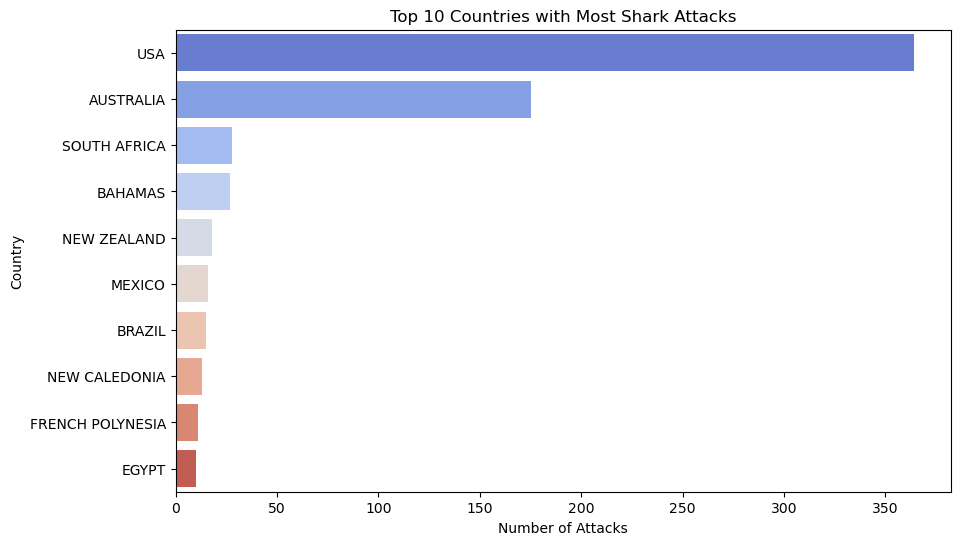

In [148]:
# Gráfico con la información de los países con más ataques
top_countries = sharks_df['Country'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title('Top 10 Countries with Most Shark Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('Country')
plt.show()

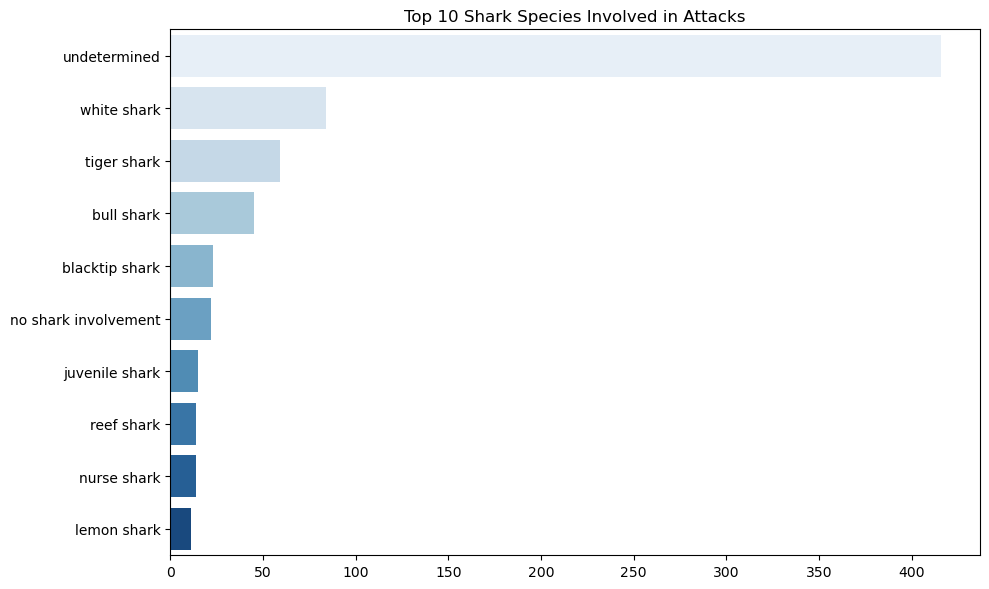

In [149]:
# Species Involved in Shark Attacks
top_species = sharks_df['Species'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_species.values, y=top_species.index, palette='Blues')
plt.title('Top 10 Shark Species Involved in Attacks')
plt.tight_layout()
plt.show()


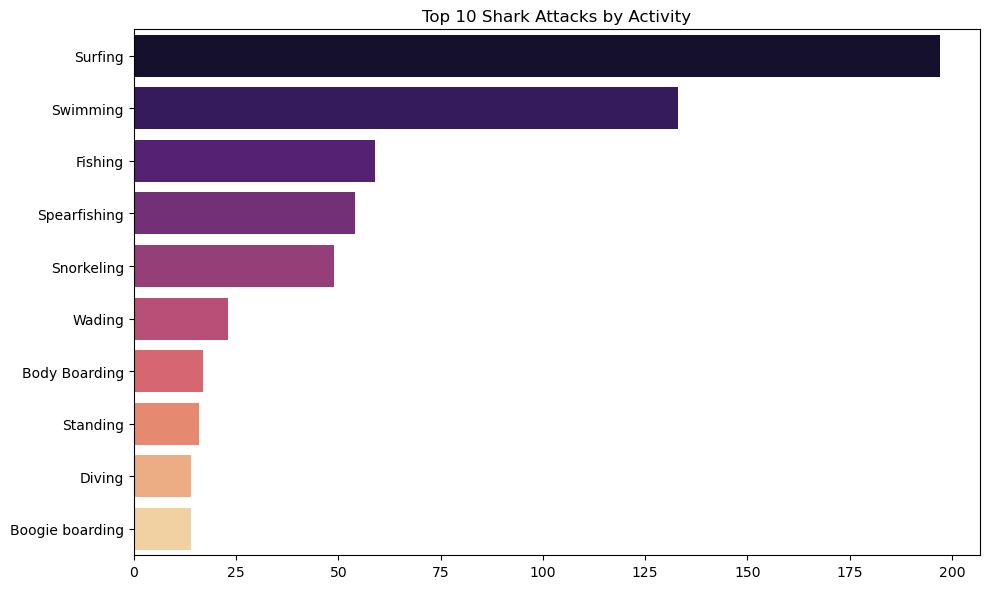

In [150]:
# Analyzing attacks by activity
top_activities = sharks_df['Activity'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_activities.values, y=top_activities.index, palette='magma')
plt.title('Top 10 Shark Attacks by Activity')
plt.tight_layout()
plt.show()


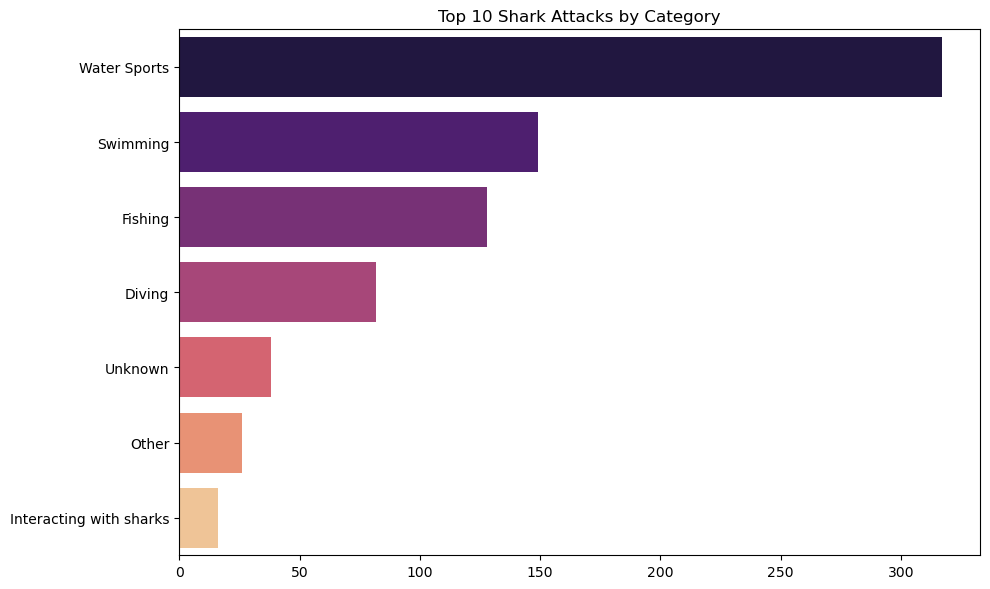

In [151]:
# Analyzing attacks by activity
top_activities = sharks_df['Category'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_activities.values, y=top_activities.index, palette='magma')
plt.title('Top 10 Shark Attacks by Category')
plt.tight_layout()
plt.show()

In [152]:
display(sharks_df.head())

Date  Year        Type    Country              State  \
38 2023-12-30  2023  Unprovoked        USA             Hawaii   
39 2023-12-29  2023  Unprovoked     MEXICO             Sonora   
40 2023-12-28  2023  Unprovoked  AUSTRALIA    South Australia   
41 2023-12-25  2023  Unprovoked  AUSTRALIA    New South Wales   
42 2023-12-24  2023  Unprovoked  AUSTRALIA  Western Australia   

                              Location       Activity                  Name  \
38                    Baby Beach, Maui        Surfing          Jason Carter   
39  Tojahui Beach, Yavaros, Huatabampo    Free diving  Víctor Alejandro “N”   
40                         Ethel Beach        Surfing           Khai Cowley   
41                             Old Bar        Surfing       Julian McLennan   
42                        Wedge Island  Foil Boarding            Troy Brown   

   Sex Age  ...       Species                  Source  pdf href formula href  \
38   M  39  ...  undetermined      Surfer, 12/31/2023  NaN          NaN  NaN   
39   M  22  ...   white shark  EuroESEuro, 12/31/2023  NaN          NaN  NaN   
40   M  15  ...   white shark       S. DeMarchi, GSAF  NaN          NaN  NaN   
41   M  16  ...  undetermined      9 News, 12/26/2023  NaN          NaN  NaN   
42   M  46  ...  whaler shark      9 News, 12/25/2023  NaN          NaN  NaN   

   Case Number Case Number.1 original order      Category year_Category  
38         NaN           NaN            NaN  Water Sports     Post 2020  
39         NaN           NaN            NaN        Diving     Post 2020  
40         NaN           NaN            NaN  Water Sports     Post 2020  
41         NaN           NaN            NaN  Water Sports     Post 2020  
42         NaN           NaN            NaN  Water Sports     Post 2020  

[5 rows x 23 columns]

In [153]:
# Crear una columna que contenga el recuento por cada valor de year_Category
sharks_df['Total_Agrupacion'] = sharks_df['year_Category'].map(sharks_df['year_Category'].value_counts())


In [154]:
# Calcular la media, varianza y desviación estándar de los recuentos de year_Category
grouped_stats = sharks_df.groupby('year_Category')['Total_Agrupacion'].agg(['mean', 'var', 'std'])


In [155]:
# Mostrar el resultado
print(grouped_stats)

                mean  var  std
year_Category                 
2020            97.0  0.0  0.0
Post 2020      303.0  0.0  0.0
Pre 2020       356.0  0.0  0.0


In [156]:
attacks_per_year = sharks_df.groupby('Year').size().reset_index(name='count')

In [157]:
attacks_per_year

Year  count
0  2017    129
1  2018    117
2  2019    110
3  2020     97
4  2021    105
5  2022     96
6  2023    102

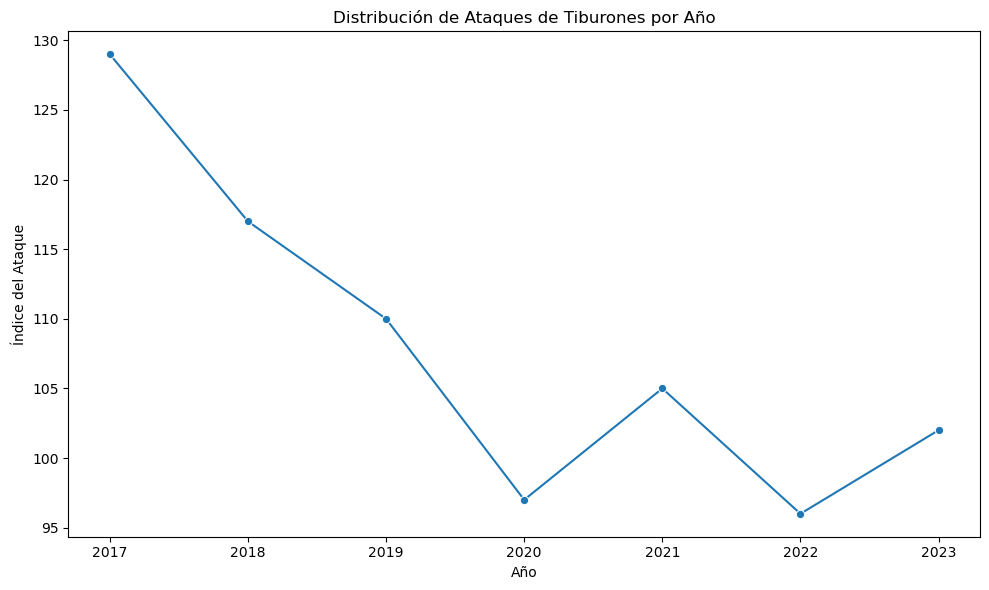

In [158]:
plt.figure(figsize=(10,6))
sns.lineplot(x=attacks_per_year['Year'], y=attacks_per_year["count"], marker="o")
plt.title('Distribución de Ataques de Tiburones por Año')
plt.xlabel('Año')
plt.ylabel('Índice del Ataque')
plt.tight_layout()
plt.show()

In [159]:
#buscamos si existen diferencias estadisticamente significativas entre los dos periodos (Prueba no parametrica)
attacks_per_year_pre_2020 = attacks_per_year[attacks_per_year["Year"] <2020]
attacks_per_year_post_2020 = attacks_per_year[attacks_per_year["Year"] > 2020]
t_statistic, p_value = stats.mannwhitneyu(attacks_per_year_pre_2020["count"], attacks_per_year_post_2020["count"])

# Resultado
print(f'Test estadístico U: {t_statistic}')
print(f'Valor p: {p_value}')

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("Hay una diferencia estadísticamente significativa entre los grupos.")
else:
    print("No hay una diferencia estadísticamente significativa entre los grupos.")

Test estadístico U: 9.0
Valor p: 0.1
No hay una diferencia estadísticamente significativa entre los grupos.


In [160]:
#buscamos si existen diferencias estadisticamente significativas entre los dos periodos (Prueba parametrica)
attacks_per_year_pre_2020 = attacks_per_year[attacks_per_year["Year"] <2020]
attacks_per_year_post_2020 = attacks_per_year[attacks_per_year["Year"] > 2020]
t_statistic, p_value = stats.ttest_ind(attacks_per_year_pre_2020["count"], attacks_per_year_post_2020["count"])

# Resultado
print(f'Test estadístico t: {t_statistic}')
print(f'Valor p: {p_value}')

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("Hay una diferencia estadísticamente significativa entre los grupos.")
else:
    print("No hay una diferencia estadísticamente significativa entre los grupos.")

Test estadístico t: 2.874328566097195
Valor p: 0.045270787819653074
Hay una diferencia estadísticamente significativa entre los grupos.


In [161]:
url_ex = '/Users/carmona/Downloads/turismo_año.csv' #Modificar con la ruta en la que te desa¡cargues el archivo
df_tourist = pd.read_csv(url_ex)

In [162]:
df_tourist.head()

País  2017  2018  2019  2020  2021  2022  2023
0    MOROCCO  11.0  12.0  13.0   3.0   4.0   7.0  10.0
1    JAMAICA   4.3   4.5   4.4   1.3   1.6   3.2   4.0
2     BELIZE   0.4   0.5   0.5   0.1   0.3   0.4   0.5
3  AUSTRALIA   9.0   9.3   9.4   1.9   3.7   6.5   7.2
4        USA  76.9  79.7  79.4  19.2  22.1  45.5  50.8

In [163]:
df_tourist.rename(columns={'País': 'Country'},inplace=True)


In [164]:
df_melted = pd.melt(df_tourist, id_vars='Country', var_name='Year', value_name='value_of_tourist')

# Convertimos la columna Year a tipo numérico si es necesario
df_melted['Year'] = pd.to_numeric(df_melted['Year'])

df_melted.head()
sharks_df.shape

(756, 24)

In [165]:
sharks_df = sharks_df.merge(df_melted,on=['Country','Year'])
sharks_df.head()

Date  Year        Type Country       State  \
0 2023-12-30  2023  Unprovoked     USA      Hawaii   
1 2023-11-05  2023  Unprovoked     USA     Florida   
2 2023-10-25  2023  Unprovoked     USA      Hawaii   
3 2023-10-15  2023  Unprovoked     USA      Hawaii   
4 2023-10-13  2023  Unprovoked     USA  California   

                                           Location  Activity  \
0                                  Baby Beach, Maui   Surfing   
1                     Juno Beach, Palm Beach County  Swimming   
2                     Pua’ena Point,  Haleiwa, Oahu   Surfing   
3                                Hanalei Bay, Kauai   Surfing   
4  Linda Mar, Pacific State Beach, San Mateo County   Surfing   

               Name Sex Age  ...  pdf href formula href Case Number  \
0      Jason Carter   M  39  ...  NaN          NaN  NaN         NaN   
1  Steven Reinhardt   M  66  ...  NaN          NaN  NaN         NaN   
2              male   M  30  ...  NaN          NaN  NaN         NaN   
3      Kevin Kanehe   M  50  ...  NaN          NaN  NaN         NaN   
4              male   M  52  ...  NaN          NaN  NaN         NaN   

  Case Number.1 original order      Category year_Category Total_Agrupacion  \
0           NaN            NaN  Water Sports     Post 2020              303   
1           NaN            NaN      Swimming     Post 2020              303   
2           NaN            NaN  Water Sports     Post 2020              303   
3           NaN            NaN  Water Sports     Post 2020              303   
4           NaN            NaN  Water Sports     Post 2020              303   

  value_of_tourist  
0             50.8  
1             50.8  
2             50.8  
3             50.8  
4             50.8  

[5 rows x 25 columns]

In [166]:
attacks_per_country = sharks_df.groupby('Country').size().reset_index(name='count')

In [167]:
attacks_per_country

Country  count
0          ARGENTINA      1
1          AUSTRALIA    175
2            BAHAMAS     27
3             BELIZE      3
4             BRAZIL     15
5             CANADA      1
6           COLOMBIA      3
7         COSTA RICA      4
8               CUBA      4
9            ECUADOR      3
10             EGYPT     10
11           ENGLAND      3
12              FIJI      5
13  FRENCH POLYNESIA     11
14         INDONESIA      2
15           JAMAICA      3
16             JAPAN      2
17            JORDAN      1
18   MALDIVE ISLANDS      4
19            MEXICO     16
20     NEW CALEDONIA     13
21       NEW ZEALAND     18
22          PORTUGAL      1
23             SAMOA      2
24        SEYCHELLES      2
25      SOUTH AFRICA     28
26             SPAIN      6
27  ST KITTS / NEVIS      1
28         ST MARTIN      1
29          THAILAND      5
30  TURKS AND CAICOS      2
31               USA    364

In [168]:
top_10_paises = sharks_df.groupby('Country')['value_of_tourist'].sum().sort_values(ascending=False).head(10)


In [169]:
top_10_paises 

Country
USA             19744.2
AUSTRALIA        1166.7
MEXICO            658.3
SPAIN             426.6
SOUTH AFRICA      235.6
BAHAMAS           157.8
EGYPT              84.6
ENGLAND            81.5
BRAZIL             78.1
THAILAND           71.6
Name: value_of_tourist, dtype: float64

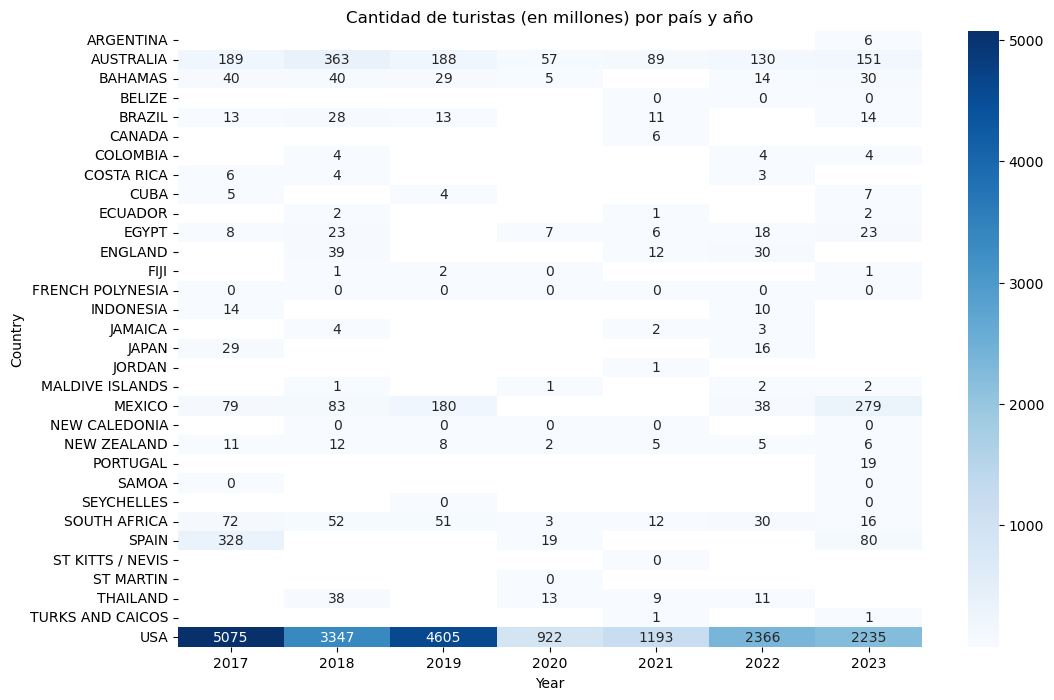

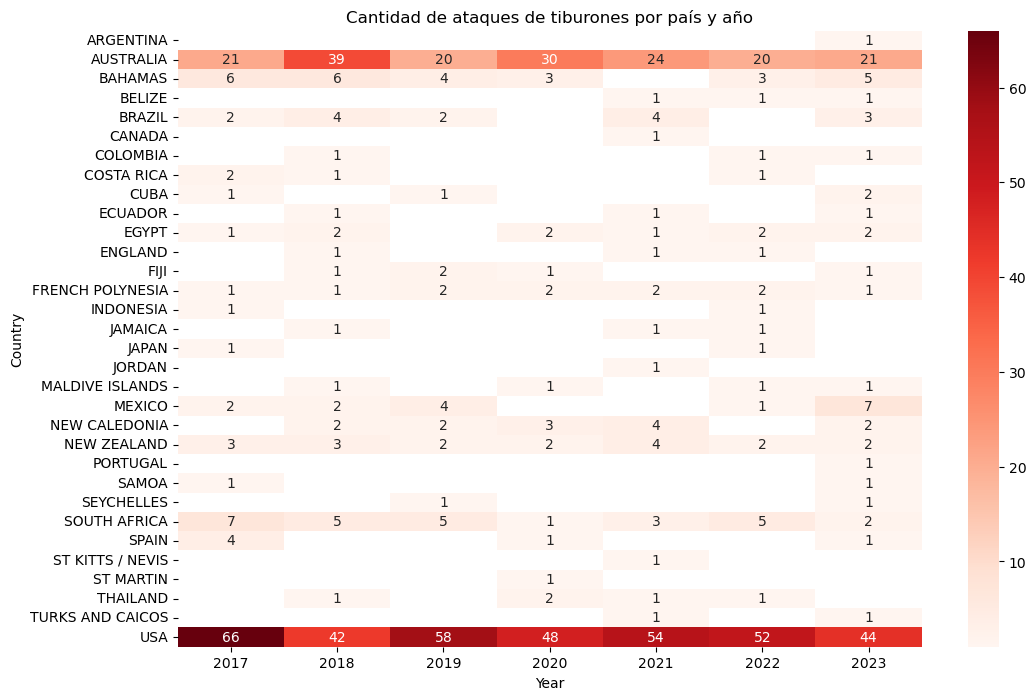

In [170]:
# Crear una tabla pivote para el heatmap con turistas y ataques
pivot_df = sharks_df.pivot_table(index='Country', columns='Year', values='value_of_tourist', aggfunc='sum')
attack_pivot = sharks_df.pivot_table(index='Country', columns='Year', aggfunc='size')

# Crear el heatmap para turistas
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, cmap='Blues', annot=True, fmt='.0f')
plt.title('Cantidad de turistas (en millones) por país y año')
plt.show()

# Crear el heatmap para ataques
plt.figure(figsize=(12, 8))
sns.heatmap(attack_pivot, cmap='Reds', annot=True, fmt='.0f')
plt.title('Cantidad de ataques de tiburones por país y año')
plt.show()


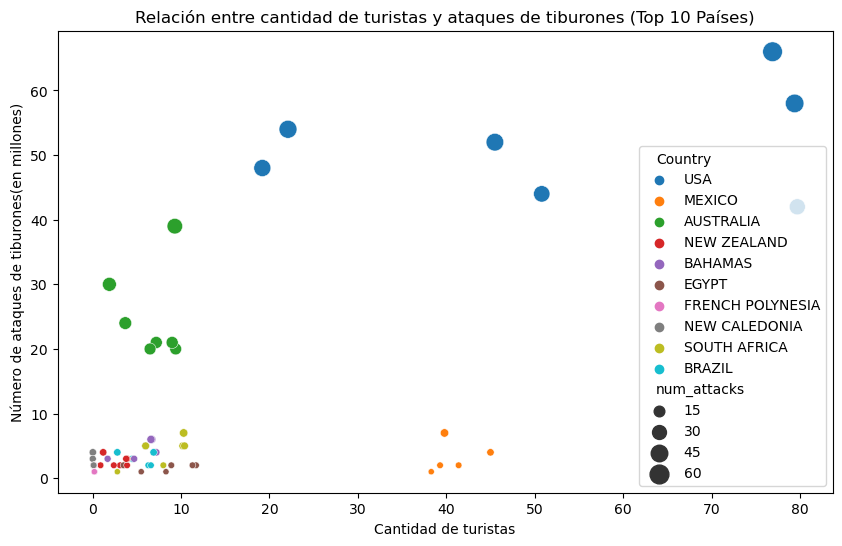

In [171]:
# Obtener el top 10 de países con más ataques
top_countries = sharks_df['Country'].value_counts().head(10).index

# Filtrar el dataframe para incluir solo los top 10 países
top_countries_df = sharks_df[sharks_df['Country'].isin(top_countries)]

# Contar el número de ataques (número de filas) por Year y Country para los top 10 países
attack_counts = top_countries_df.groupby(['Year', 'Country']).size().reset_index(name='num_attacks')

# Unir con la cantidad de turistas
tourist_attacks = top_countries_df[['Year', 'Country', 'value_of_tourist']].drop_duplicates()
merged_df = pd.merge(tourist_attacks, attack_counts, on=['Year', 'Country'])

# Crear gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='value_of_tourist', y='num_attacks', hue='Country', size='num_attacks', sizes=(20, 200))

# Añadir títulos y etiquetas
plt.title('Relación entre cantidad de turistas y ataques de tiburones (Top 10 Países)')
plt.xlabel('Cantidad de turistas')
plt.ylabel('Número de ataques de tiburones(en millones)')

plt.show()



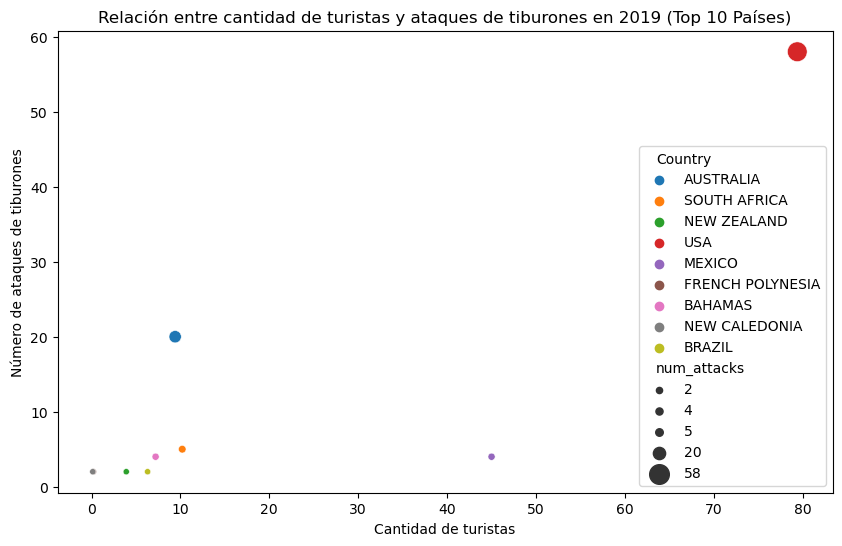

In [172]:
# Filtrar el dataframe para incluir solo el año 2019 y los top 10 países
top_countries = sharks_df['Country'].value_counts().head(10).index
top_countries_df_2019 = sharks_df[(sharks_df['Country'].isin(top_countries)) & (sharks_df['Year'] == 2019)]

# Contar el número de ataques (número de filas) por Country en 2019
attack_counts_2019 = top_countries_df_2019.groupby(['Country']).size().reset_index(name='num_attacks')

# Unir con la cantidad de turistas
tourist_attacks_2019 = top_countries_df_2019[['Year', 'Country', 'value_of_tourist']].drop_duplicates()
merged_df_2019 = pd.merge(tourist_attacks_2019, attack_counts_2019, on=['Country'])

# Crear gráfico de dispersión para 2019
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df_2019, x='value_of_tourist', y='num_attacks', hue='Country', size='num_attacks', sizes=(20, 200))

# Añadir títulos y etiquetas
plt.title('Relación entre cantidad de turistas y ataques de tiburones en 2019 (Top 10 Países)')
plt.xlabel('Cantidad de turistas')
plt.ylabel('Número de ataques de tiburones')

plt.show()


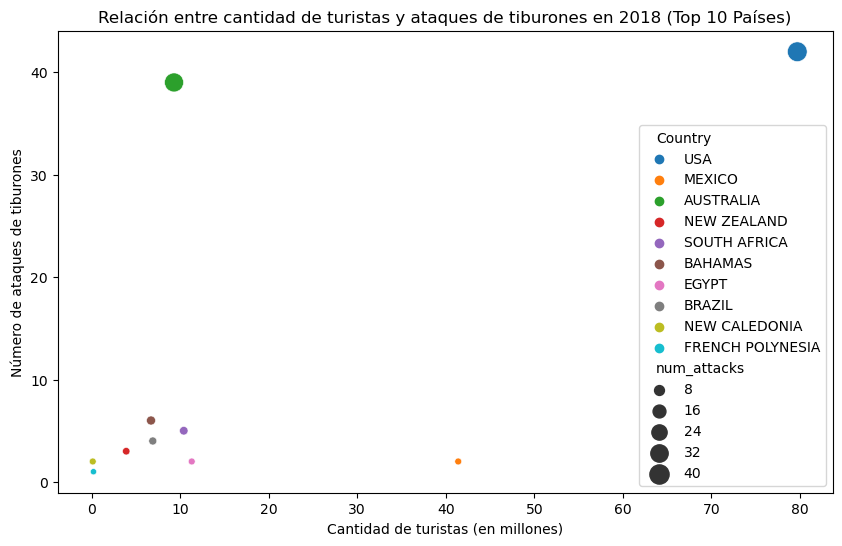

In [173]:
# Filtrar el dataframe para incluir solo el año 2018 y los top 10 países
top_countries = sharks_df['Country'].value_counts().head(10).index
top_countries_df_2018 = sharks_df[(sharks_df['Country'].isin(top_countries)) & (sharks_df['Year'] == 2018)]

# Contar el número de ataques (número de filas) por Country en 2018
attack_counts_2018 = top_countries_df_2018.groupby(['Country']).size().reset_index(name='num_attacks')

# Unir con la cantidad de turistas
tourist_attacks_2018 = top_countries_df_2018[['Year', 'Country', 'value_of_tourist']].drop_duplicates()
merged_df_2018 = pd.merge(tourist_attacks_2018, attack_counts_2018, on=['Country'])

# Crear gráfico de dispersión para 2018
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df_2018, x='value_of_tourist', y='num_attacks', hue='Country', size='num_attacks', sizes=(20, 200))

# Añadir títulos y etiquetas
plt.title('Relación entre cantidad de turistas y ataques de tiburones en 2018 (Top 10 Países)')
plt.xlabel('Cantidad de turistas (en millones)')
plt.ylabel('Número de ataques de tiburones')

plt.show()

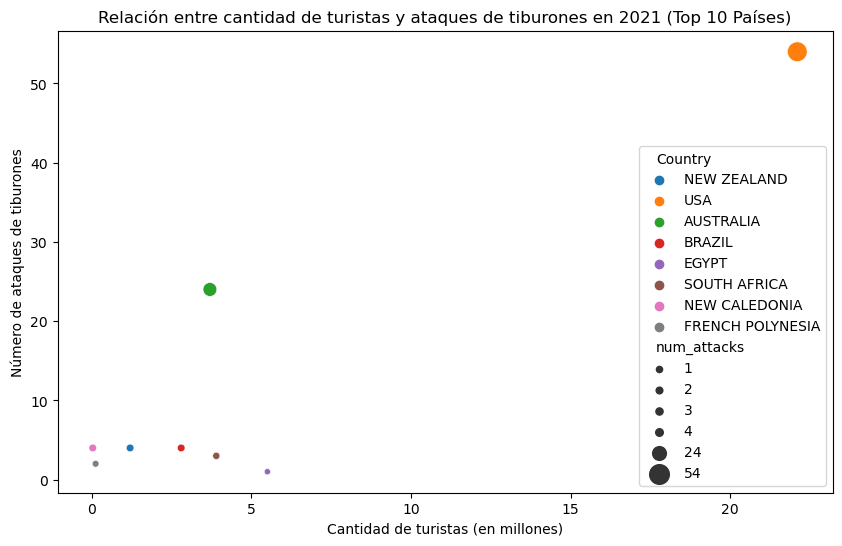

In [174]:
# Filtrar el dataframe para incluir solo el año 2021 y los top 10 países
top_countries = sharks_df['Country'].value_counts().head(10).index
top_countries_df_2021 = sharks_df[(sharks_df['Country'].isin(top_countries)) & (sharks_df['Year'] == 2021)]

# Contar el número de ataques (número de filas) por Country en 2021
attack_counts_2021 = top_countries_df_2021.groupby(['Country']).size().reset_index(name='num_attacks')

# Unir con la cantidad de turistas
tourist_attacks_2021 = top_countries_df_2021[['Year', 'Country', 'value_of_tourist']].drop_duplicates()
merged_df_2021 = pd.merge(tourist_attacks_2021, attack_counts_2021, on=['Country'])

# Crear gráfico de dispersión para 2021
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df_2021, x='value_of_tourist', y='num_attacks', hue='Country', size='num_attacks', sizes=(20, 200))

# Añadir títulos y etiquetas
plt.title('Relación entre cantidad de turistas y ataques de tiburones en 2021 (Top 10 Países)')
plt.xlabel('Cantidad de turistas (en millones)')
plt.ylabel('Número de ataques de tiburones')

plt.show()

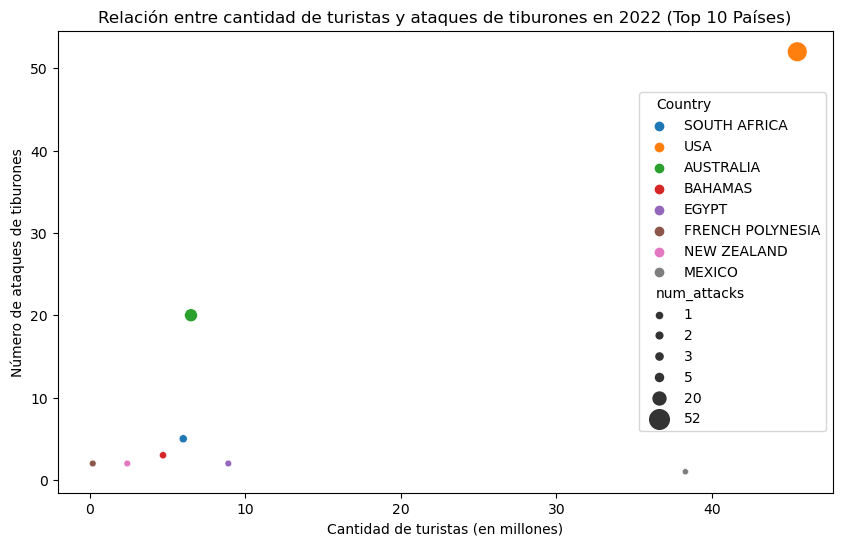

In [175]:
# Filtrar el dataframe para incluir solo el año 2022 y los top 10 países
top_countries = sharks_df['Country'].value_counts().head(10).index
top_countries_df_2022 = sharks_df[(sharks_df['Country'].isin(top_countries)) & (sharks_df['Year'] == 2022)]

# Contar el número de ataques (número de filas) por Country en 2022
attack_counts_2022 = top_countries_df_2022.groupby(['Country']).size().reset_index(name='num_attacks')

# Unir con la cantidad de turistas
tourist_attacks_2022 = top_countries_df_2022[['Year', 'Country', 'value_of_tourist']].drop_duplicates()
merged_df_2022 = pd.merge(tourist_attacks_2022, attack_counts_2022, on=['Country'])

# Crear gráfico de dispersión para 2022
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df_2022, x='value_of_tourist', y='num_attacks', hue='Country', size='num_attacks', sizes=(20, 200))

# Añadir títulos y etiquetas
plt.title('Relación entre cantidad de turistas y ataques de tiburones en 2022 (Top 10 Países)')
plt.xlabel('Cantidad de turistas (en millones)')
plt.ylabel('Número de ataques de tiburones')

plt.show()

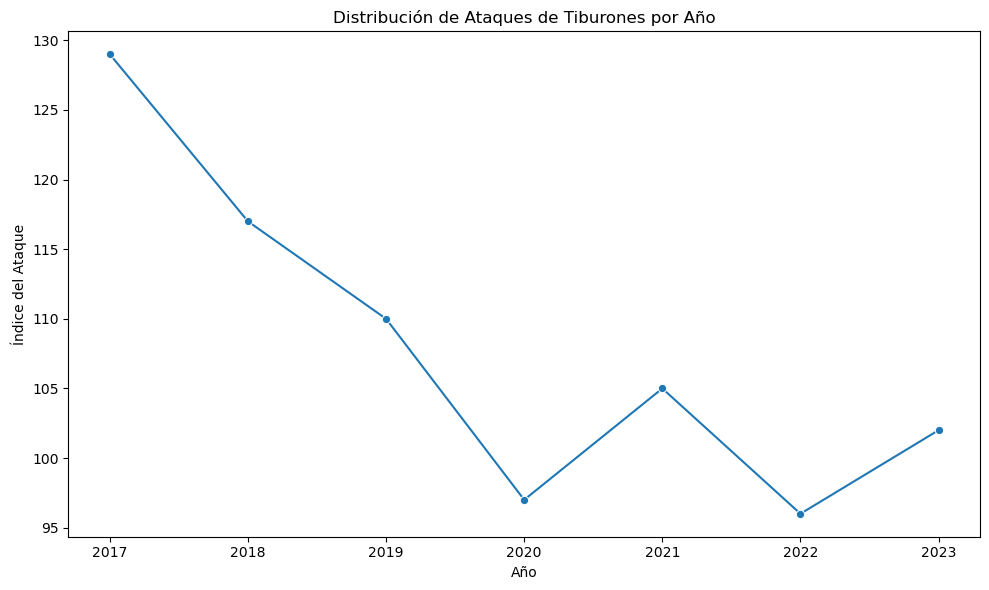

In [176]:
plt.figure(figsize=(10,6))
sns.lineplot(x=attacks_per_year['Year'], y=attacks_per_year["count"], marker="o")
plt.title('Distribución de Ataques de Tiburones por Año')
plt.xlabel('Año')
plt.ylabel('Índice del Ataque')
plt.tight_layout()
plt.show()

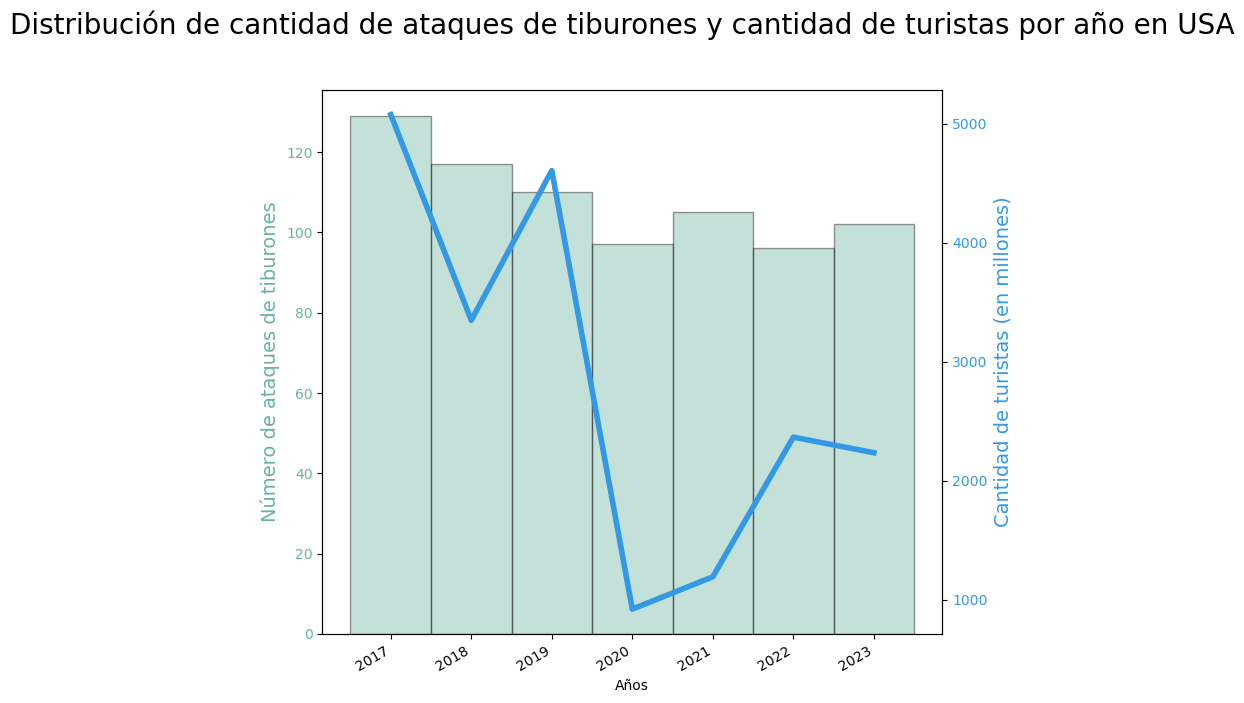

In [177]:
COLOR_TEMPERATURE = "#69b3a2"
COLOR_PRICE = "#3399e6"
fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

usa_sharks_df = sharks_df[sharks_df['Country'] == 'USA']

# Agrupar datos solo para USA
attacks_per_year_usa = usa_sharks_df.groupby('Year').size().reset_index(name='count')
tourists_per_year_usa = usa_sharks_df.groupby('Year')['value_of_tourist'].sum().reset_index() 

ax1.bar(attacks_per_year['Year'], attacks_per_year['count'], color=COLOR_TEMPERATURE, edgecolor="black", alpha=0.4, width=1.0)
ax2.plot(tourists_per_year_usa['Year'], tourists_per_year_usa['value_of_tourist'],color=COLOR_PRICE, lw=4)

ax1.set_xlabel("Años")
ax1.set_ylabel("Número de ataques de tiburones", color=COLOR_TEMPERATURE, fontsize=14)
ax1.tick_params(axis="y", labelcolor=COLOR_TEMPERATURE)

ax2.set_ylabel("Cantidad de turistas (en millones)", color=COLOR_PRICE, fontsize=14)
ax2.tick_params(axis="y", labelcolor=COLOR_PRICE)

fig.suptitle("Distribución de cantidad de ataques de tiburones y cantidad de turistas por año en USA", fontsize=20)
fig.autofmt_xdate()

plt.show()